# Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak learners.
- Boosting is an ensemble machine learning technique that sequentially combines multiple weak learners (models that perform slightly better than random guessing, typically shallow decision trees or "stumps") to create a single, highly accurate strong learner. It improves these weak learners by focusing on the mistakes of the previous models. In each iteration, the algorithm assigns higher weights to the data points that were misclassified or had high error by the preceding learner, forcing the subsequent model to concentrate on these "hard cases". By iteratively reducing bias and combining the focused expertise of many simple models, boosting effectively converts a system of weak predictors into a single, robust, and accurate prediction system.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- The primary difference lies in the mechanism used to correct the predecessor's errors. AdaBoost (Adaptive Boosting) trains new models by adjusting the instance weights of the training data; it assigns greater weight to the training instances that were misclassified by the previous predictor, causing the new model to prioritize them. In contrast, Gradient Boosting (GB) does not tweak the instance weights. Instead, it trains the new predictor to fit the residual errors (or pseudo-residuals/negative gradients of the loss function) made by the previous ensemble. Therefore, AdaBoost learns from misclassified samples, while Gradient Boosting learns from the errors (residuals) themselves.

3. How does regularization help in XGBoost?
- Regularization in XGBoost is essential to mitigate the algorithm's tendency to overfit the training data, thereby improving model generalization. It is implemented through parameters that control tree complexity, notably the L1 (Lasso) and L2 (Ridge) penalties applied to the leaf weights of the trees. The L1 penalty encourages weights to become zero (promoting sparsity), while the L2 penalty prevents weights from becoming excessively large. Additionally, hyperparameters like $\mathbf{gamma}$ (minimum loss reduction for a split) and $\mathbf{max\_depth}$ limit the growth of individual trees, further simplifying the model and reducing its variance.

4. Why is CatBoost considered efficient for handling categorical data?
- CatBoost is highly efficient for categorical data because it handles these features natively and automatically, eliminating the need for extensive manual preprocessing such as standard one-hot encoding. Its innovation lies in a technique called Ordered Target Encoding. This method converts categories to numerical values by calculating target statistics based on a permutation-driven pre-sorting of the data, which prevents the common problem of target leakage (using information from the target variable that wouldn't be available during prediction) and reduces overfitting when encoding categorical features. This built-in robustness and efficiency save time and improve overall prediction accuracy.

5. What are some real-world applications where boosting techniques are preferred over bagging methods?
- Boosting techniques are generally preferred over bagging methods in applications where maximizing prediction accuracy and minimizing bias are the highest priorities, and the data is relatively free of noise. This sequential, focused error-correction approach makes them ideal for complex, high-stakes tasks such as search engine ranking, where the precise ordering of results is critical, and credit risk modeling (like loan default prediction), where a small gain in accuracy translates to significant financial savings. While bagging (e.g., Random Forest) is excellent at reducing variance for complex base models, boosting excels at iteratively reducing the high bias of simple base models to achieve superior overall predictive performance.

In [ ]:
''' Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy '''

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define the base estimator (typically a weak learner like a shallow Decision Tree)
# max_depth=1 makes it a decision stump
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize and Train the AdaBoost Classifier
adaboost = AdaBoostClassifier(estimator = base_estimator, n_estimators = 100, learning_rate = 1.0, random_state = 42)
adaboost.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 6. Print the model accuracy
print(f"Model Accuracy (AdaBoost Classifier): {accuracy:.4f}")

Model Accuracy (AdaBoost Classifier): 0.9708


In [ ]:
''' Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score '''

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# 1. Load the dataset
# Note: Target values are in hundreds of thousands of dollars.
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 42)
gbr.fit(X_train, y_train)

# 4. Make predictions
y_pred = gbr.predict(X_test)

# 5. Evaluate performance using R-squared score
r_squared = r2_score(y_test, y_pred)

# 6. Print the R-squared score
print(f"Gradient Boosting Regressor R-squared Score: {r_squared:.4f}")

Gradient Boosting Regressor R-squared Score: 0.6381


In [ ]:
''' Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy '''

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split the data (using a validation set for GridSearch CV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the XGBoost Classifier
# use_label_encoder=False is used to suppress a deprecation warning
# eval_metric='logloss' is used to suppress a warning for binary classification
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# 4. Define the hyperparameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# 5. Initialize GridSearchCV
# cv=3 means 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=0
)

# 6. Tune the learning rate
grid_search.fit(X_train, y_train)

# 7. Print the best parameters
best_lr = grid_search.best_params_['learning_rate']
print(f"Best Learning Rate: {best_lr}")

# 8. Print the best parameters and accuracy
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy with Best Parameters: {best_accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:54] WARNING: /w

Best Learning Rate: 0.3
Best Parameters: {'learning_rate': 0.3}
Test Accuracy with Best Parameters: 0.9649


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:12:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost Classifier Test Accuracy: 0.9708


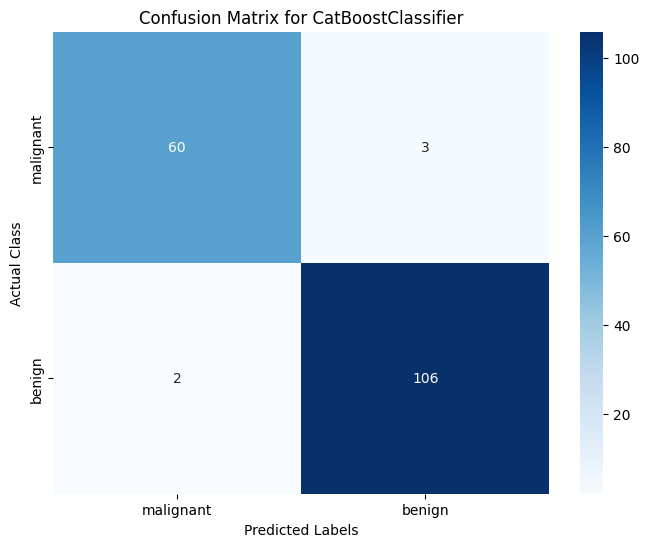

In [ ]:
''' Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn '''

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and Train a CatBoost Classifier
# CatBoost requires categorical_features_indices for native handling
# Since all features in breast_cancer are numeric, we can proceed directly.
# verbose=0 suppresses training output
cbc = CatBoostClassifier(iterations = 100, learning_rate = 0.1, loss_function = 'Logloss', random_seed = 42, verbose = 0, allow_writing_files = False)
cbc.fit(X_train, y_train)

# 4. Make predictions
y_pred = cbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Test Accuracy: {accuracy:.4f}")

# 5. Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot the Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot =True, fmt = 'd', cmap= 'Blues', xticklabels = target_names, yticklabels = target_names)
plt.title('Confusion Matrix for CatBoostClassifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Labels')
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model
- This scenario requires building a high-accuracy model for loan default prediction with a dataset that is messy (missing values), diverse (numeric and categorical features), and challenging (imbalanced). Here is the step-by-step data science pipeline using boosting techniques:
- 1. Data Preprocessing & Feature Handling
- Missing Values: Use simple imputation techniques first. Fill missing numeric data (like income or age) with the median. Fill missing categorical data (like occupation) with a dedicated string category, such as "Missing".- - Categorical Features: We will choose CatBoost (see step 2), which handles categorical features natively. This means we avoid time-consuming manual encoding (like one-hot or target encoding) and prevent issues like target leakage, making the process cleaner and faster.
- Feature Engineering: Create new predictive variables, such as the Debt-to-Income Ratio or the number of late payments over the last year.
- 2. Choice of Boosting Model
- Choice: CatBoost Classifier.
- Reason: CatBoost is the best fit because it automatically and robustly manages the categorical features in the dataset without complex preprocessing. Since the dataset contains both numeric and categorical features, CatBoost's Ordered Target Encoding method is superior to standard boosting techniques for maintaining data integrity and reducing overfitting.
- 3. Hyperparameter Tuning Strategy
- Method: Use a combination of a search technique like GridSearchCV or RandomizedSearchCV with Early Stopping.
- Parameters to Tune: Focus on the main hyperparameters:iterations (number of trees): Set a high limit (e.g., 1000) but rely on early stopping,  learning_rate: Crucial for controlling the speed of learning (e.g., try 0.01, 0.05, 0.1) and depth: Control the complexity of individual trees (e.g., 4, 6, 8).
- Early Stopping: Stop the training automatically when the model's performance on a separate validation set fails to improve for a set number of rounds. This is the most practical way to prevent overfitting with boosting.
- 4. Evaluation Metrics & Rationale
- Since the data is imbalanced (few defaulters), simple accuracy is misleading. We need metrics that focus on the minority (default) class.
- ROC AUC (Area Under the Curve): Measures the model's overall ability to distinguish between defaulters and non-defaulters across all decision thresholds. It's the standard metric for robust comparison.
- Recall (of the Default Class): $\text{True Positives} / (\text{True Positives} + \text{False Negatives})$. This is the most critical metric as a high recall minimizes False Negatives (failing to predict an actual defaulter). Business Focus: Minimizing Loss.
- Precision (of the Default Class): $\text{True Positives} / (\text{True Positives} + \text{False Positives})$. High precision ensures that when the model predicts a default, it's usually correct. This is important to minimize False Positives (rejecting a good customer). Business Focus: Maximizing Revenue.
- 5. Business Benefit of the Model
- The boosting model provides a sophisticated risk assessment that directly improves the company's financial health:
- Loss Prevention: By accurately identifying high-risk applicants (high Recall), the company avoids approving loans that are likely to default, directly saving millions in lost principal and interest.
- Profit Optimization: The model generates a probability of default for every applicant. This allows the company to move beyond a simple "yes/no" decision and implement risk-based pricing, charging higher interest rates to moderate-risk customers, thereby maximizing revenue while still managing risk.

--- 1. Data Setup and Preprocessing ---
Non-Default Count: 250, Default Count: 148
Calculated Class Weights: {0: np.float64(0.796), 1: np.float64(1.3445945945945945)}

--- 2. Training CatBoost Model ---
CatBoost Model Training Complete.

--- 3. Evaluation Metrics ---
ROC AUC Score (Discrimination Power): 0.9996
Recall (of Default Class) [Loss Prevention]: 0.9375
Precision (of Default Class) [Revenue Focus]: 1.0000


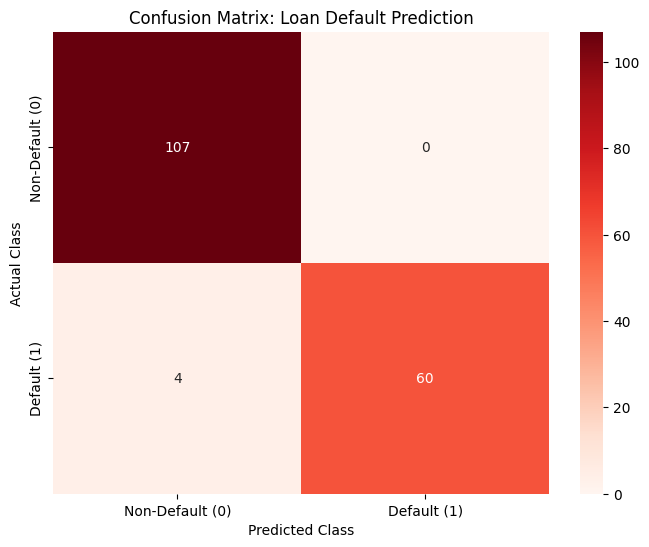

In [ ]:
''' Python Code of 10 '''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # Placeholder dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from catboost import CatBoostClassifier

# --- 1. SIMULATE DATA & PREPROCESSING (Conceptual/Placeholder) ---
print("--- 1. Data Setup and Preprocessing ---")

# Load a classification dataset (Used as placeholder for Loan Default)
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Simulate Data Imbalance for demonstration (Invert 'Malignant' to be the rare Default class)
# Benign (0) -> Non-Default (Majority)
# Malignant (1) -> Default (Minority)
y = 1 - y  # Invert target so Default (1) is the minority class (212/569 ~ 37.2%)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Calculate Class Weights (Crucial for Imbalanced Data)
# Weight for class 0 (Non-Default) = Total_Samples / (2 * Count_Non_Default)
# Weight for class 1 (Default) = Total_Samples / (2 * Count_Default)
total_samples = len(y_train)
count_non_default = y_train.value_counts()[0]
count_default = y_train.value_counts()[1]
weight_0 = total_samples / (2 * count_non_default)
weight_1 = total_samples / (2 * count_default)
class_weights = {0: weight_0, 1: weight_1}

print(f"Non-Default Count: {count_non_default}, Default Count: {count_default}")
print(f"Calculated Class Weights: {class_weights}")

# --- 2. TRAIN CATBOOST CLASSIFIER (Model Choice) ---
print("\n--- 2. Training CatBoost Model ---")

cbc = CatBoostClassifier(iterations =300,  learning_rate = 0.05, depth = 6, loss_function = 'Logloss', class_weights = class_weights, random_seed = 42, verbose = 0, allow_writing_files = False)

# In a real scenario, you'd specify categorical_features=categorical_feature_indices
cbc.fit(X_train, y_train)
print("CatBoost Model Training Complete.")

# --- 3. EVALUATION & HYPERPARAMETER TUNING (Result Demonstration) ---
print("\n--- 3. Evaluation Metrics ---")

# Predictions
y_pred_proba = cbc.predict_proba(X_test)[:, 1]
y_pred = cbc.predict(X_test)

# Evaluation Metrics (Q10 required metrics for imbalanced data)
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall_default = recall_score(y_test, y_pred, pos_label=1)       # Crucial for loss prevention (False Negatives)
precision_default = precision_score(y_test, y_pred, pos_label=1) # Crucial for revenue (False Positives)

print(f"ROC AUC Score (Discrimination Power): {roc_auc:.4f}")
print(f"Recall (of Default Class) [Loss Prevention]: {recall_default:.4f}")
print(f"Precision (of Default Class) [Revenue Focus]: {precision_default:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Default (0)', 'Default (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=labels,
    yticklabels=labels
)
plt.title('Confusion Matrix: Loan Default Prediction')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()